<span class="badge badge-info">ПРИНЯТИЕ РЕШЕНИЙ В БИЗНЕСЕ НА ОСНОВЕ ДАННЫХ</span>
# Аналитика в «интернет-магазине» 

## Описание проекта

Будучи аналитиком крупного интернет-магазина, вместе с отделом маркетинга, подготовили список гипотез для **`увеличения выручки`**.

**`Цель проекта`**: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Описание данных

**Данные для первой части**

**Таблица `hypothesis` (информация о 9 гипотез по увеличению выручки интернет-магазина):**
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

**Таблица `orders` (информация о заказах):**
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.

**Таблица `visitors` (информация о пользователях в указанную дату в указанной группе A/B-теста):**
 - date — дата; 
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

## Инструкция по выполнению проекта

### Шаг 1. Загрузка данных и подготовка к анализу

 - 1.1. Импорт библиотек и загрузка данных.
 - 1.2. Осмотр данных.
 - 1.3. Выводы о данных.
 - 1.4. Предобработка таблицы **hypothesis** о 9 гипотез по увеличению выручки интернет-магазина.
 - 1.5. Предобработка таблицы **orders** о заказах в интернет-магазине.
 - 1.6. Предобработка таблицы **visitors** о пользователях в указанную дату в указанной группе A/B-теста.
 - 1.7. Выводы о предобработки данных.

### Шаг 2. Принятие решении в бизнесе на основе данных

### Часть 1. Приоритизация гипотез

 - 2.1.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - 2.1.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - 2.1.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло. 

### Часть 2. Анализ A/B-теста

 - 2.2.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - 2.2.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - 2.2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - 2.2.4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
 - 2.2.5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
 - 2.2.6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - 2.2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - 2.2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - 2.2.9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - 2.2.10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
 - 2.2.11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - 2.2.12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
 - 2.2.13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 - 2.2.14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Шаг 3. Общие выводы

------

## Шаг 1. Загрузка данных и подготовка к анализу

### 1.1. Импорт библиотек и загрузка данных.

In [1]:
# Необходимые библиотеки для исследования.
import pandas as pd                             # для анализа данных
import numpy as np                              # для математических вычислений

import seaborn as sns                           # для визуализации данных
from matplotlib import pyplot as plt            # для визуализации данных
%matplotlib inline

import datetime as dt                           # для преобразования к типу данных
from datetime import datetime      
import scipy.stats as stats                     # для высокоуровневых математических вычислений
from scipy import stats as st                   

import warnings                                 # для предупреждений в программе 
warnings.filterwarnings('ignore')               # фильтр предупреждений

In [2]:
# Загрузка данных.
orders = pd.read_csv('orders.csv')              # информация о заказах в интернет-магазине
visitors = pd.read_csv('visitors.csv')          # информация о пользователях в указанную дату в указанной группе A/B-теста
hypothesis = pd.read_csv('hypothesis.csv')      # информация о 9-и гипотез по увеличению выручки интернет-магазина

In [3]:
# С помощью pd.option настроим вывод так чтобы
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1                # текст в ячейке отражался полностью вне зависимости от длины;
pd.options.display.float_format = '{:.2f}'.format   # все числа отражались с двумя знаками после запятой.

In [4]:
# Установка эстетических параметров графиков.
sns.set(style='whitegrid', palette='afmhot_r', font='sans-serif', font_scale=1.2, color_codes=False, rc=None) 

### 1.2. Осмотр данных.

In [5]:
# Напишем функцию для получения информации о датасетах
def info_dataframe(dataframe):
    display("Получение первых 5 строк таблицы:")
    display(dataframe.head())
    display("Выведем статистику о датасете:")
    display(dataframe.describe().T)
    display(dataframe.describe(include='object').T)
    display("Получение общей информации о данных в таблице:")
    dataframe.info()
    display("Количество пропущенных значений:")
    display(dataframe.isnull().sum())
    duplicates = dataframe.duplicated().sum()
    display()
    display("Количество дубликатов: {} строк".format(duplicates))              
    display("Доля дубликатов от общего количества записей: {:.1%}".format((duplicates/len(dataframe))))

**Рассмотрим таблицу `hypothesis` о 9 гипотез по увеличению выручки интернет-магазина.**

In [6]:
info_dataframe(hypothesis) # информация о 9-и гипотез по увеличению выручки интернет-магазина

'Получение первых 5 строк таблицы:'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


'Выведем статистику о датасете:'

,count,mean,std,min,25%,50%,75%,max
Reach,9.00,4.78,3.15,1.00,3.00,3.00,8.00,10.00
Impact,9.00,4.78,3.19,1.00,3.00,3.00,7.00,10.00
Confidence,9.00,5.56,3.05,1.00,3.00,7.00,8.00,9.00
Efforts,9.00,4.89,2.80,1.00,3.00,5.00,6.00,10.00


,count,unique,top,freq
Hypothesis,9,9,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",1


'Получение общей информации о данных в таблице:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


'Количество пропущенных значений:'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Количество дубликатов: 0 строк'

'Доля дубликатов от общего количества записей: 0.0%'

Всего в таблице 9 строк (наблюдений) и 5 столбца, встречаются следующие типы данных: object (строки) и int64 (целые числа). Пропущенных значений и дубликатов не наблюдается.

**Рассмотрим таблицу `orders` о заказах в интернет-магазине.**

In [7]:
info_dataframe(orders) # информация о заказах в интернет-магазине

'Получение первых 5 строк таблицы:'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'Выведем статистику о датасете:'

,count,mean,std,min,25%,50%,75%,max
transactionId,1197.00,2155621385.53,1229084904.76,1062393.00,1166775572.00,2145193898.00,3237740112.00,4293855558.00
visitorId,1197.00,2165960143.10,1236014192.15,5114589.00,1111826046.00,2217984702.00,3177606451.00,4283872382.00
revenue,1197.00,8348.01,39191.13,50.00,1220.00,2978.00,8290.00,1294500.00


,count,unique,top,freq
date,1197,31,2019-08-05,48
group,1197,2,B,640


'Получение общей информации о данных в таблице:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'Количество пропущенных значений:'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Количество дубликатов: 0 строк'

'Доля дубликатов от общего количества записей: 0.0%'

Всего в таблице 1197 строк (наблюдений) и 5 столбца, встречаются следующие типы данных: object (строки) и int64 (целые числа). Некорректный тип данных, в дате в столбце 'date'. Пропущенных значений и дубликатов не наблюдается.

**Рассмотрим таблицу `visitors` о пользователях в указанную дату в указанной группе A/B-теста.**

In [8]:
info_dataframe(visitors) # информация о пользователях в указанную дату в указанной группе A/B-теста

'Получение первых 5 строк таблицы:'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


'Выведем статистику о датасете:'

,count,mean,std,min,25%,50%,75%,max
visitors,62.00,607.29,114.40,361.00,534.00,624.50,710.50,770.00


,count,unique,top,freq
date,62,31,2019-08-10,2
group,62,2,A,31


'Получение общей информации о данных в таблице:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'Количество пропущенных значений:'

date        0
group       0
visitors    0
dtype: int64

'Количество дубликатов: 0 строк'

'Доля дубликатов от общего количества записей: 0.0%'

Всего в таблице 62 строки (наблюдений) и 3 столбца, встречаются следующие типы данных: object (строки) и int64 (целые числа). Некорректный тип данных, в дате в столбце 'date'. Пропущенных значений и дубликатов не наблюдается.

### 1.3. Выводы о данных.

Наблюдаются следующие проблемы с данными:
 - названия столбцов написаны не совсем удобно в таблице orders;
 - варьируется регистр букв в переменных в таблице orders и hypothesis;
 - некорректные типы данных, в дате в столбцах 'date', в таблице visitors и orders.

### 1.4. Предобработка таблицы **`hypothesis`** о 9и гипотез по увеличению выручки интернет-магазина.

In [9]:
hypothesis.columns # получаем перечень названий столбцов таблицы hypothesis

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

In [10]:
hypothesis.columns = hypothesis.columns.str.lower() # приведём столбцы к нижнему регистру
hypothesis.columns.tolist() # проверка результатов

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [11]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### 1.5. Предобработка таблицы **`orders`** о заказах в интернет-магазине.

In [12]:
orders.columns # получаем перечень названий столбцов таблицы orders

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [13]:
orders.columns = orders.columns.str.lower() # приведём столбцы к нижнему регистру
orders.columns.tolist() # проверка результатов

['transactionid', 'visitorid', 'date', 'revenue', 'group']

In [14]:
orders.rename(columns={'transactionid': 'orderid', 
                      'visitorid': 'userid'}, inplace=True) # переименуем столбцы для удобства дальнейшей работы
orders.columns.tolist() # проверка результатов

['orderid', 'userid', 'date', 'revenue', 'group']

In [15]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d') # замена типа данных на datetime

In [16]:
revenue_zero_values = orders[orders['revenue'] == 0]['revenue'].count() # кол-во нулевых значений в столбце 'revenue'
print('Количество строк с нулевым значением: {} строк'.format(revenue_zero_values))

Количество строк с нулевым значением: 0 строк


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderid  1197 non-null   int64         
 1   userid   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


### 1.6. Предобработка таблицы **`visitors`** о пользователях в указанную дату в указанной группе A/B-теста.

In [18]:
visitors.columns # получаем перечень названий столбцов таблицы visitors

Index(['date', 'group', 'visitors'], dtype='object')

In [19]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d') # замена типа данных на datetime

Проверим на корректность распределения пользователей - может быть есть те, кто попал в обе группы.

In [20]:
# Посмотрим пользователей, кто попал в обе группы.
visitors.groupby('visitors').agg({'group':'nunique'}).query('group == 2')

,group
visitors,
490,2
610,2
718,2


3 пользователя попали в обе группы одновременно.

In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### 1.7. Выводы о предобработки данных.

 - В таблице `hypothesis`, привели столбцы к нижнему регистру, проверили на отсутствие пропусков и дубликатов.

 - В таблице `orders` переименовали столбец 'transactionid' на 'orderid', и 'visitorid' на 'userid' для удобства дальнейшей работы. Также, привели столбцы к нижнему регистру, заменили тип данных на datetime в 'date' и проверили на отсутствие пропусков и дубликатов. Провели анализ нулевых значений в столбце 'revenue', данных значений не обнаружили.

 - В таблице `visitors` привели даты в столбце 'date' к типу datetime и также, проверили на отсутствие пропусков и дубликатов.

Названия столбцов и их тип данных теперь корректны и удобны для дальнейшей работы. Их исправление позволит провести анализ точнее.

## Шаг 2. Принятие решений в бизнесе на основе данных

### Часть 1. Приоритизация гипотез

### 2.1.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Фреймворк **ICE** (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»): `𝐼𝐶𝐸 𝑆𝐶𝑂𝑅𝐸 = (𝐼𝑚𝑝𝑎𝑐𝑡 𝑥 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒)/𝐸𝑓𝑓𝑜𝑟𝑡𝑠`

In [22]:
# Построим таблицу с гипотезами.
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [23]:
# Посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице hypothesis. 
# Выведем столбцы и отсортированные по столбцу 'ICE'.
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


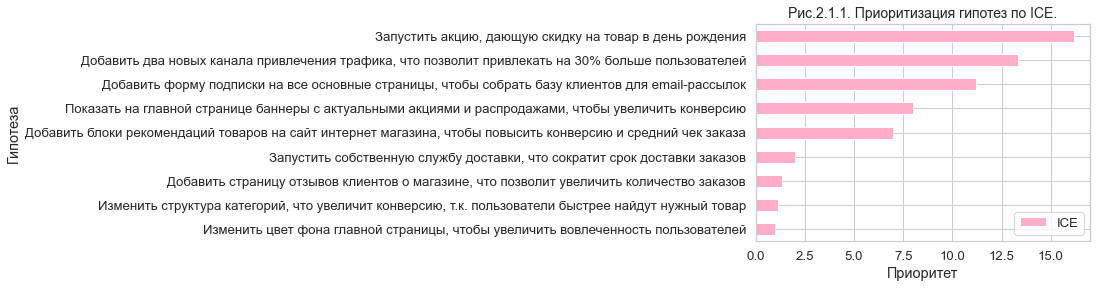

In [24]:
# Построим график.
ax = hypothesis[['hypothesis','ICE']].set_index('hypothesis')\
                                     .sort_values('ICE', ascending=True)\
                                     .plot(kind='barh', color='#ffaec9')
ax.set_title('Рис.2.1.1. Приоритизация гипотез по ICE.', fontsize=14)
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
plt.show()

#### Выводы

Наиболее перспективные гипотезы по `ICE`:
 - (1)	Запустить акцию, дающую скидку на товар в день рождения [8];
 - (2)	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей [0];
 - (3)	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок [7].

### 2.1.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

У ICE метода есть модификация **RICE** (R от англ. reach, «охват»): `𝑅𝐼𝐶𝐸 𝑆𝐶𝑂𝑅𝐸 = (𝑅𝑒𝑎𝑐ℎ 𝑥 𝐼𝑚𝑝𝑎𝑐𝑡 𝑥 𝐶𝑜𝑛𝑓𝑖𝑑𝑒𝑛𝑐𝑒) / 𝐸𝑓𝑓𝑜𝑟𝑡𝑠`

Фреймворк RICE состоит из четырёх компонент:
 - Reach — скольких пользователей затронет изменение, которое вы хотите внести;
 - Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
 - Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
 - Efforts — сколько стоит протестировать эту гипотезу.

In [25]:
# Посчитаем RICE для гипотез. Добавим полученные значения RICE к существующей таблице hypothesis. 
# Выведем столбцы и отсортированные по столбцу 'RICE'.
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


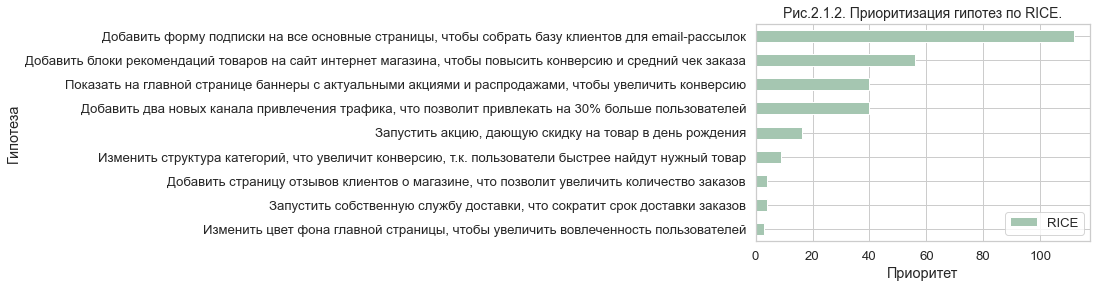

In [26]:
# Построим график.
ax = hypothesis[['hypothesis','RICE']].set_index('hypothesis')\
                                      .sort_values('RICE', ascending=True)\
                                      .plot(kind='barh', color='#a5c6b1')
ax.set_title('Рис.2.1.2. Приоритизация гипотез по RICE.', fontsize=14)
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
plt.show()

#### Выводы

Наиболее перспективные гипотезы по `RICE`:
 - (1)	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок [7];
 - (2)	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа [2];
 - (3)	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей [0];
 
Однако на первом месте уже гипотеза под номером [7]. Так получилось, потому что ее параметр Reach равен 10, в то время как у других гипотез он меньше. Кроме силы гипотез, нужно учитывать и то, как много пользователей она затронет.

### 2.1.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

По фреймворку ICE наиболее перспективные гипотезы под номером 8, 0 и 7.

 - Запустить акцию, дающую скидку на товар в день рождения [8];
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей [0];
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок [7].

После применения RICE приоритизация гипотез изменилась, на гипотезы под номером 7, 2 и 0.

 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок [7];
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа [2];
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей [0];

Это связано с тем, что в расчете фреймворка RICE учитывается охват пользователей “Reach”, а в ICE – нет.

### Часть 2. Анализ A/B-теста

### 2.2.1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [27]:
# Прочтём данные из файлов.
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
orders

,orderid,userid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [28]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Чтобы построить графики, нужно собрать кумулятивные данные. **`Объявим датафрейм cumulativeData`** со столбцами:
 - date — дата;
 - group — группа A/B-теста (A или B);
 - orders — кумулятивное количество заказов на указанную дату в указанной группе;
 - buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
 - revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
 - visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [29]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                              .agg({'date' : 'max', 
                                    'group' : 'max',
                                    'orderid' : pd.Series.nunique, 
                                    'userid' : pd.Series.nunique, 
                                    'revenue' : 'sum'}), axis=1)\
                              .sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                                .agg({'date' : 'max', 
                                      'group' : 'max', 
                                      'visitors' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


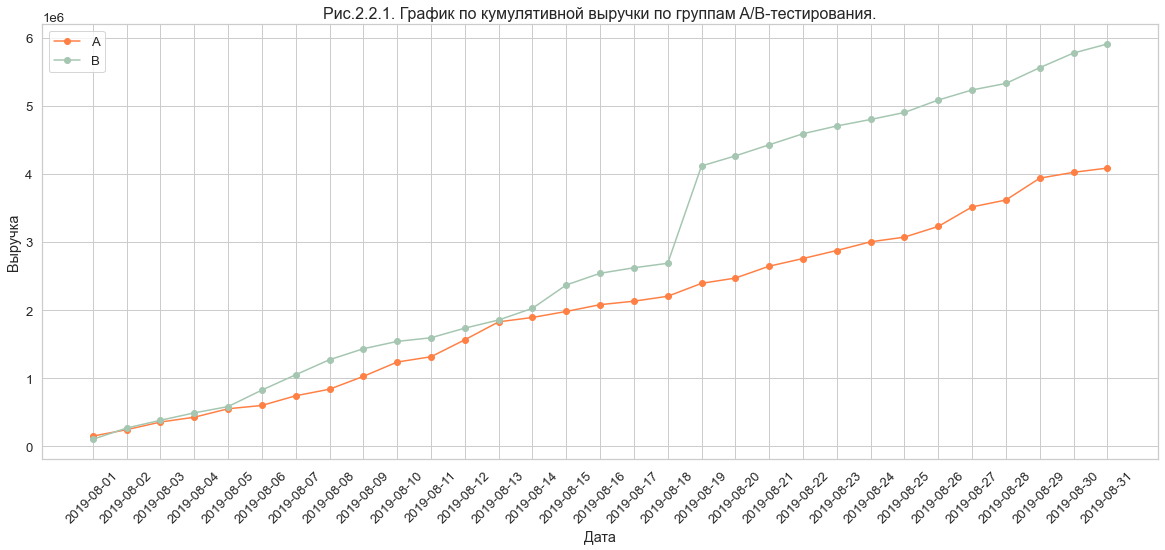

In [30]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', marker='o', color='#ff8045')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', marker='o', color='#a5c6b1')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Рис.2.2.1. График по кумулятивной выручки по группам A/B-тестирования.', fontsize=16)
plt.legend()
plt.show()

#### Выводы

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В в точке 2019-08-17 резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы нужно будет проанализировать.

### 2.2.2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

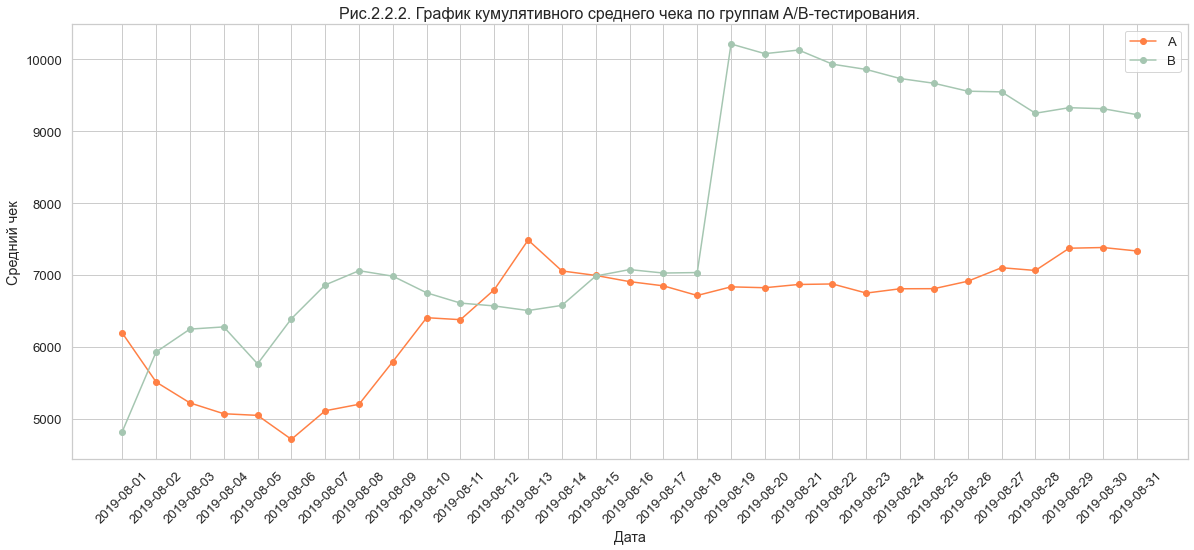

In [31]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', 
         marker='o', color='#ff8045')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B',
         marker='o', color='#a5c6b1')

plt.ylabel("Средний чек")
plt.xlabel('Дата')
plt.title('Рис.2.2.2. График кумулятивного среднего чека по группам A/B-тестирования.', fontsize=16)
plt.legend()
plt.show()

#### Выводы

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике 17 августа 2019г.). Требуется дополнительный анализ выбросов, которые искажают результаты.

### 2.2.3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

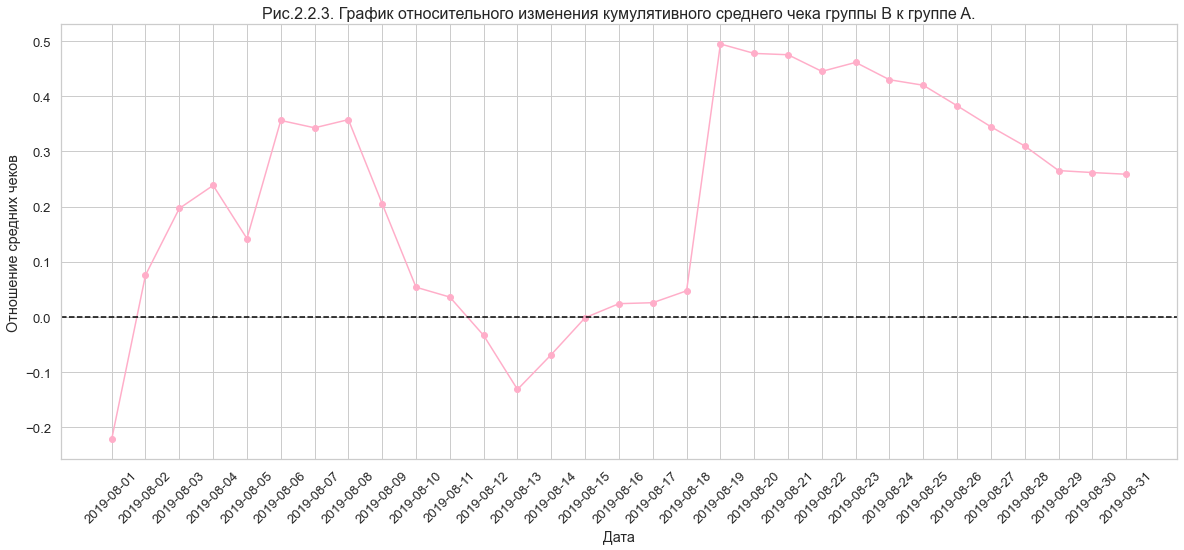

In [32]:
# Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() 
# (от англ. **horizontal line across the axis, «горизонтальная линия поперек оси»):

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])

sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
                                          (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
                                           marker='o', color='#ffaec9')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel("Отношение средних чеков")
plt.xlabel('Дата')
plt.title('Рис.2.2.3. График относительного изменения кумулятивного среднего чека группы B к группе A.', fontsize=16)
plt.show()

#### Выводы

Мы получили график относительного различия в среднем чеке между группами. Результаты теста значительно и резко меняются в несколько дат. Видимо, именно тогда были совершены аномальные заказы. 

### 2.2.4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

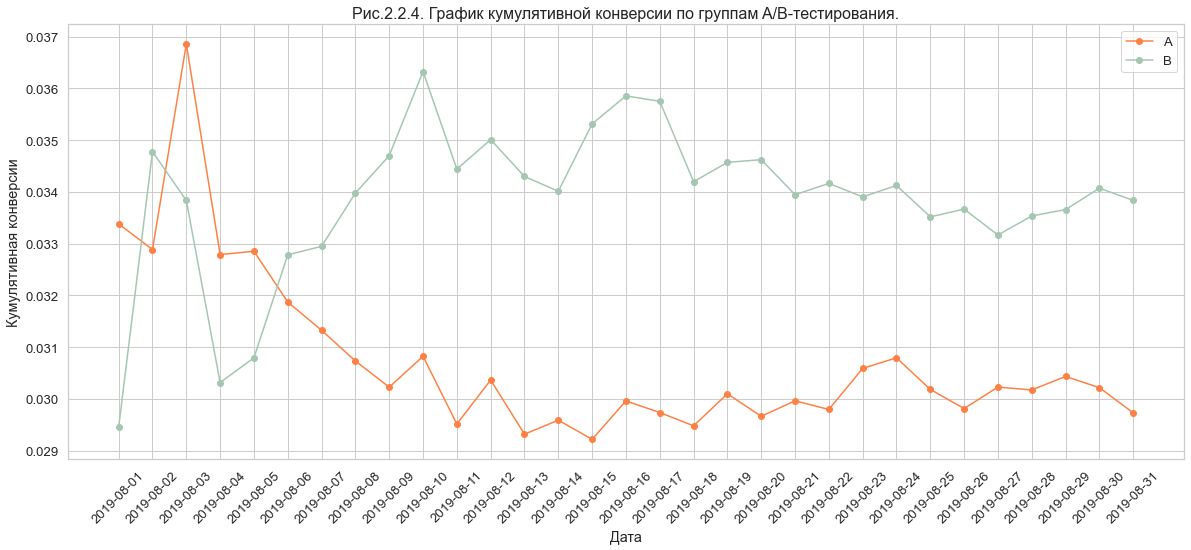

In [33]:
# Проанализируем график кумулятивной конверсии. 

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', marker='o', color='#ff8045')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', marker='o', color='#a5c6b1')
plt.ylabel("Кумулятивная конверсии")
plt.xlabel('Дата')
plt.title('Рис.2.2.4. График кумулятивной конверсии по группам A/B-тестирования.', fontsize=16)
plt.legend()
plt.show()

#### Выводы

В начале теста группа А имела большую конверсию, чем В. 4 августа 2019 года тенденция изменилась, конверсия группы В начала расти, а потом выровнялась; конверсия группы А наоборот, просела, а потом выровнялась и осталась ниже группы В.

### 2.2.5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

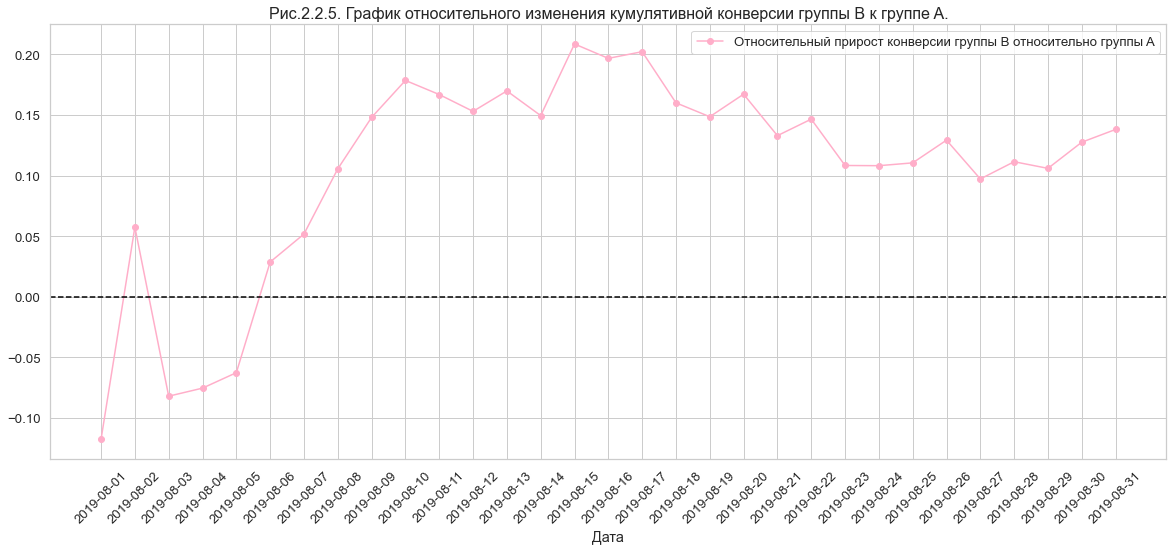

In [34]:
#  Построим график относительно различия кумулятивной конверсии группы B к группе A:

# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date',
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)

# строим график
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A", marker='o', color='#ffaec9')
plt.xlabel('Дата')
plt.title('Рис.2.2.5. График относительного изменения кумулятивной конверсии группы B к группе A.', fontsize=16)
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

#### Выводы

В начале теста наблюдаются резкие скачки группы В относительно группы А. 5 августа 2019 года тенденция меняется, группа B значительно выигрывает группе A, затем вырывается вперёд. Группа В показывает прирост конверсии начиная с 6 августа 2019 года, и на протяжении всего периода конверсия в группе В превышает конверсию в группе А в среднем 15%. 

### 2.2.6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

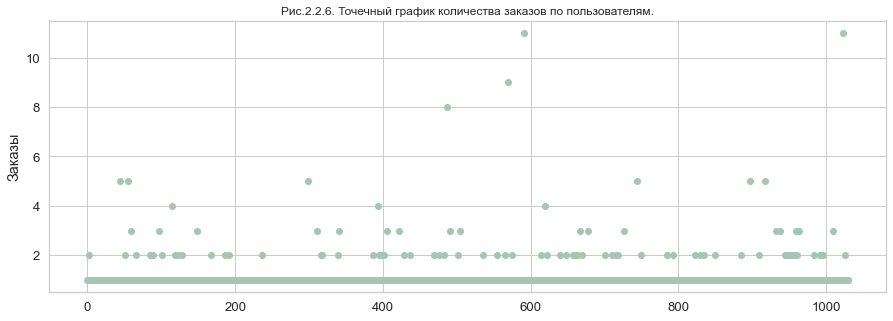

,userid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [35]:
# Подсчитаем количество заказов по пользователям и посмотрим на результат.
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
                      .groupby('userid', as_index=False)\
                      .agg({'orderid' : pd.Series.nunique})
ordersByUsers.columns = ['userid','orders']

# Построим точечный график количества заказов по пользователям.
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'], color='#a5c6b1')
plt.ylabel('Заказы')
plt.title('Рис.2.2.6. Точечный график количества заказов по пользователям.', fontsize=12)
plt.show()
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

#### Выводы

Большинство пользователей совершило всего 1 заказ. Пользователей, заказавших 2 заказа совсем мало. Они вполне могут быть аномальными. Также есть пользователи, которые совершали 5, 8, 9 и 11 заказов, что кажется очень странным. 

### 2.2.7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [36]:
# Посчитаем 95-й и 99-й выборочные перцентили количества заказов по пользователям методом np.percentile()
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('95-й перцентиль количества заказов на пользователя: {} заказа'.format(percentiles[0]))
print('99-й перцентиль количества заказов на пользователя: {} заказа'.format(percentiles[1]))

95-й перцентиль количества заказов на пользователя: 2.0 заказа
99-й перцентиль количества заказов на пользователя: 4.0 заказа


#### Выводы

Не более 5% пользователей совершили больше 2 заказов. И не более 1% пользователей – больше 4 заказов. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### 2.2.8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

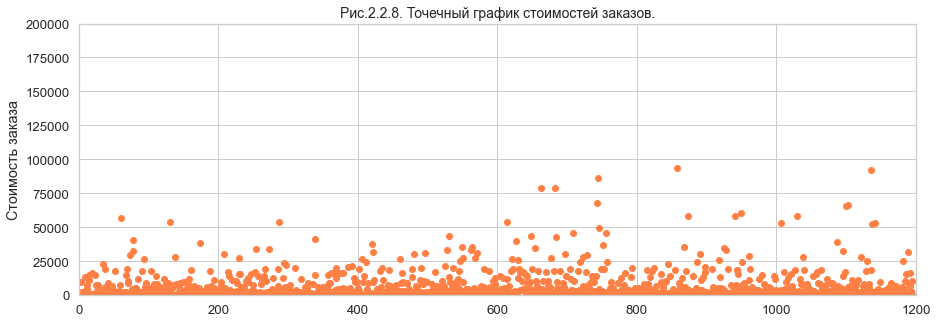

count   1197.00   
mean    8348.01   
std     39191.13  
min     50.00     
25%     1220.00   
50%     2978.00   
75%     8290.00   
max     1294500.00
Name: revenue, dtype: float64

In [37]:
# Построим точечный график стоимостей заказов.
# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0,len(orders)))

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'], color='#ff8045')
plt.ylabel('Стоимость заказа')
plt.title('Рис.2.2.8. Точечный график стоимостей заказов.', fontsize=14)
plt.axis([0, 1200, 0, 200000])
plt.show()
orders['revenue'].describe()

#### Выводы

Сумма большинства заказов меньше 25 000 рублей. Однако заказов на эту сумму не очень много. Есть выбросы в районе 25 000 рублей и выше. Заказ на 1 294 500 рублей в интернет-магазине выглядит весьма аномально. 

### 2.2.9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [38]:
# Посчитаем 95-й и 99-й выборочные перцентили тоимости заказов методом np.percentile()
percentiles = np.percentile(orders['revenue'], [95, 99])
print('95-й перцентиль стоимости заказов: {:.0f} выручка заказа'.format(percentiles[0]))
print('99-й перцентиль стоимости заказов: {:.0f} выручка заказа'.format(percentiles[1]))

95-й перцентиль стоимости заказов: 28000 выручка заказа
99-й перцентиль стоимости заказов: 58233 выручка заказа


#### Выводы

Не более, чем 5% заказов чек дороже 28 000 рублей. И не более чем 1% заказов – дороже 58 233 рублей. Красиво жить не запретишь. По крайней мере, одному проценту пользователей. Границу для определения аномальных заказов, выберем 28 000 рублей.

### 2.2.10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Начнём с подготовки данных. Создадим новый **`датафрейм data`.**

In [39]:
# Изучим код и устройство таблицы data.
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <=x['date']]\
                                     .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <=x['date']]\
                                     .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'orderid', 'userid', 'revenue']].groupby('date', as_index=False)\
                                     .agg({'orderid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                 .agg({'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis=1)\
                                 .sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'orderid', 'userid', 'revenue']].groupby('date', as_index=False)\
                                     .agg({'orderid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                 .agg({'date' : 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}), axis=1)\
                                 .sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
                   .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
                   .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
                   .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head())

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01  24              148579           21               
1  2019-08-02  20              93822            24               
2  2019-08-03  24              112473           16               
3  2019-08-04  16              70825            17               
4  2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996   

Напомним названия столбцов данных:

 - date — дата;
 - ordersPerDateA — количество заказов в выбранную дату в группе A;
 - revenuePerDateA — суммарная выручка в выбранную дату в группе A;
 - ordersPerDateB — количество заказов в выбранную дату в группе B;
 - revenuePerDateB — суммарная выручка в выбранную дату в группе B;
 - ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
 - revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
 - ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
 - revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
 - visitorsPerDateA — количество пользователей в выбранную дату в группе A;
 - visitorsPerDateB — количество пользователей в выбранную дату в группе B;
 - visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
 - visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

**Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.**

In [40]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userid', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('userid', as_index=False).agg({'orderid' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userid', as_index=False).agg({'orderid' : pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders']

In [41]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, 
                     index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
                     index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [42]:
# Посчитаем статистическую значимость различия конверсии. Применим тест Манна-Уитни.
# Выведем p-value для сравнения конверсии между группами. Округлим p-value до 3 знаков после запятой. 
# Вычислим и выведем относительное различие в конверсии между группами. Округлим до 3 знаков после запятой.
print("p-value нулевой гипотезы о равенстве конверсий в группах А и В: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы B по отношению к группе A: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value нулевой гипотезы о равенстве конверсий в группах А и В: 0.008
Относительный прирост конверсии группы B по отношению к группе A: 0.138


Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза H₀**: Нет статистически значимых различий по конверсии между группами А и В по «сырым» данным
- **Альтернативная гипотеза H₁**: Есть статистически значимое различие по конверсии между группами А и В по «сырым» данным

In [43]:
# Выполним проверку гипотезы.

alpha = 0.05 # критический уровень статистической значимости для формулирования двусторонних гипотез
results = stats.mannwhitneyu(sampleA, sampleB)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008396177528376304
Отвергаем нулевую гипотезу


#### Выводы

Первое число p-value = 0,008 значительно меньше 0,05. Анализ «сырых» данных сообщает, что в конверсии между группами `есть статистически значимые различия в конверсии между группами.` 
Относительный прирост конверсии группы B по отношению к группе A равен 13,8%. 


### 2.2.11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [44]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами,
# передадим критерию mannwhitneyu() данные о выручке с заказов.
print("p-value нулевой гипотезы о равенстве среднего чека в группах А и В: {0:.3f}".format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное изменение среднего чека в группе B по отношению группы A: {0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value нулевой гипотезы о равенстве среднего чека в группах А и В: 0.365
Относительное изменение среднего чека в группе B по отношению группы A: 0.259


Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем чеке между группами А и В по «сырым» данным
- **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем чеке между группами А и В по «сырым» данным

In [45]:
# Выполним проверку гипотезы.

alpha = 0.05 # критический уровень статистической значимости для формулирования двусторонних гипотез
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3646454927716229
Не получилось отвергнуть нулевую гипотезу


#### Выводы

P-value = 0,365 значительно больше 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть, `статистически значимых различий в среднем чеке между группами нет.` 

Впрочем, средний чек группы B значительно выше среднего чека группы А, так как, относительное изменение среднего чека в группе B по отношению группы A: 25,9%.

### 2.2.12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за `аномальных пользователей` тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице **`abnormalUsers`**.

In [46]:
# Узнаем, сколько всего аномальных пользователей методом len().
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userid'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userid']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userid']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print('Всего аномальных пользователей: {}'.format(len(abnormalUsers))) 

Всего аномальных пользователей: 74


**Посчитаем статистическую значимость различий в конверсии между группами теста по «очищенным» данным.**

In [47]:
#  Сначала подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'],pd.Series(0,
                         index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'],pd.Series(0,
                         index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# Применим статистический критерий Манна-Уитни к полученным выборкам:
print("p-value, после очистки данных: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост конверсии группы B по отношению к группе A после очистки данных: {0:.3f}".format(
       sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value, после очистки данных: 0.007
Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173


Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза H₀**: Нет статистически значимых различий по конверсии между группами А и В по «очищенным» данным
- **Альтернативная гипотеза H₁**: Есть статистически значимое различие по конверсии между группами А и В по «очищенным» данным

In [48]:
# Выполним проверку гипотезы.

alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.006521296371518379
Отвергаем нулевую гипотезу


#### Выводы

Результаты по конверсии практически не изменились. Как и с сырыми данными, `статистическая значимость достигнута`. Сегмент В значительно лучше сегмента А. 

### 2.2.13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [49]:
# Применим статистический критерий Манна-Уитни:
print("p-value после очистки данных: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(
    orders['userid'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(
    orders['group']=='B', np.logical_not(orders['userid'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(
    orders['userid'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(
    orders['group']=='A', np.logical_not(orders['userid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value после очистки данных: 0.369
Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020


Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза H₀**: Нет статистически значимых различий в среднем чеке между группами А и В по «очищенным» данным
- **Альтернативная гипотеза H₁**: Есть статистически значимое различие в среднем чеке между группами А и В по «очищенным» данным

In [50]:
# Выполним проверку гипотезы.

alpha = 0.05
results = stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['userid'].isin(abnormalUsers)))]['revenue'], 
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['userid'].isin(abnormalUsers)))]['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3692408756572825
Не получилось отвергнуть нулевую гипотезу


#### Выводы

P-value после очистки данных увеличился, 0,369 > 0,05. Также, `статистически значимых различий в среднем чеке между группами нет`; но разница между сегментами сократилась с 25,9% до -2%. Средний чек группы B, после очистки данных, стал ниже среднего чека группы A на 2%.

### 2.2.14. Примите решение по результатам теста и объясните его. 

Варианты решений: 
 - 1. Остановить тест, зафиксировать победу одной из групп. 
 - 2. Остановить тест, зафиксировать отсутствие различий между группами. 
 - 3. Продолжить тест.

## Шаг 3. Общие выводы

Подводя итоги, имеющиеся факты:

**По приоритизации гипотез:**

 - По фреймворку ICE наиболее перспективные гипотезы под номером 8, 0 и 7. 
 - После применения RICE приоритизация гипотез изменилась, на гипотезы под номером 7, 2 и 0. Это связано с тем, что в расчете фреймворка RICE учитывается охват пользователей “Reach”, а в ICE – нет.

**По анализу A/B-теста:**

- Есть статистически значимое различие по конверсии между группами как по «сырым» данным, так и после фильтрации аномалий.
- До и после очистки данных, показатель конверсии в группе B больше чем показатель в группе A, до очистки данных он составлял 14%, после очистки 17%.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, но разница между сегментами сократилась с 25,9% до 2%. 
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, имеют тенденцию к росту.
- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из обнаруженных фактов, **`тест следует остановить и признать его успешным. При имеющихся данных группа B лучше группы A, судя по результатам, можно смело зафиксировать победу группе B.`**